# Example 11

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, VoltageSource, Resistor, Line, LabelNode, CurrentSource, Ground
from CircuitCalculator.SimpleCircuit.DiagramSolution import real_network_dc_solution
from CircuitCalculator.Network.NodalAnalysis import nodal_analysis_solver

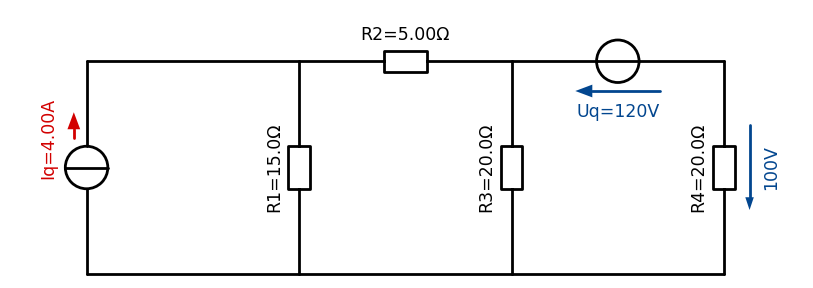

In [2]:
R1, R2, R3, R4 = 15, 5, 20, 20
Uq = 120
Iq = 4

with Schematic(unit=5) as schematic:
    schematic += CurrentSource(I=Iq, name='Iq').up()
    schematic += Line().right()
    schematic += (R2_ := Resistor(R=R2, name='R2').right())
    schematic += (R3_ := Resistor(R=R3, name='R3').down())
    schematic += Line().left()
    schematic += Line().left()
    schematic += Line().right().at(R3_.end)
    schematic += Resistor(R=R4, name='R4').up()
    schematic += VoltageSource(V=Uq, name='Uq', precision=3, reverse=True).left()
    schematic += Resistor(R=R1, name='R1').down().at(R2_.start)
    schemdraw_solution = real_network_dc_solution(schematic)
    schematic += schemdraw_solution.draw_voltage('R4', reverse=True)